## imporintg the libraries

In [1]:
import numpy as np 
import pandas as pd 
from sklearn.model_selection import train_test_split 
from sklearn import linear_model 
import matplotlib.pyplot as plt
from scipy.stats import skew
import seaborn as sns
import plotly.express as px
from sklearn.preprocessing import LabelEncoder
from sklearn import linear_model as lm
import sklearn.metrics as metrics
import statsmodels.api as sm
import statsmodels.formula.api as smf
import scipy.stats as stats
from sklearn.tree import DecisionTreeRegressor  
from sklearn.ensemble import RandomForestRegressor

## reading the dataset

In [2]:
sid=pd.read_csv("Steel_industry_data.csv")
sid.head()

,date,Usage_kWh,Lagging_Current_Reactive.Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2(tCO2),Lagging_Current_Power_Factor,Leading_Current_Power_Factor,NSM,WeekStatus,Day_of_week,Load_Type
0,01/01/2018 00:15,3.17,2.95,0.0,0.0,73.21,100.0,900,Weekday,Monday,Light_Load
1,01/01/2018 00:30,4.00,4.46,0.0,0.0,66.77,100.0,1800,Weekday,Monday,Light_Load
2,01/01/2018 00:45,3.24,3.28,0.0,0.0,70.28,100.0,2700,Weekday,Monday,Light_Load
3,01/01/2018 01:00,3.31,3.56,0.0,0.0,68.09,100.0,3600,Weekday,Monday,Light_Load
4,01/01/2018 01:15,3.82,4.50,0.0,0.0,64.72,100.0,4500,Weekday,Monday,Light_Load


## Shape

In [3]:
sid.shape

(35040, 11)

## checking the features

In [4]:
sid.columns

Index(['date', 'Usage_kWh', 'Lagging_Current_Reactive.Power_kVarh',
       'Leading_Current_Reactive_Power_kVarh', 'CO2(tCO2)',
       'Lagging_Current_Power_Factor', 'Leading_Current_Power_Factor', 'NSM',
       'WeekStatus', 'Day_of_week', 'Load_Type'],
      dtype='object')

## Info

In [5]:
sid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35040 entries, 0 to 35039
Data columns (total 11 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   date                                  35040 non-null  object 
 1   Usage_kWh                             35040 non-null  float64
 2   Lagging_Current_Reactive.Power_kVarh  35040 non-null  float64
 3   Leading_Current_Reactive_Power_kVarh  35040 non-null  float64
 4   CO2(tCO2)                             35040 non-null  float64
 5   Lagging_Current_Power_Factor          35040 non-null  float64
 6   Leading_Current_Power_Factor          35040 non-null  float64
 7   NSM                                   35040 non-null  int64  
 8   WeekStatus                            35040 non-null  object 
 9   Day_of_week                           35040 non-null  object 
 10  Load_Type                             35040 non-null  object 
dtypes: float64(6), 

## Checking for NULL values

In [7]:
sid.isnull().sum()

date                                    0
Usage_kWh                               0
Lagging_Current_Reactive.Power_kVarh    0
Leading_Current_Reactive_Power_kVarh    0
CO2(tCO2)                               0
Lagging_Current_Power_Factor            0
Leading_Current_Power_Factor            0
NSM                                     0
WeekStatus                              0
Day_of_week                             0
Load_Type                               0
dtype: int64

## Checking for NA values

print(sid.isna().sum())

## checking the basic statistics of the dataset

In [9]:
sid.describe()

,Usage_kWh,Lagging_Current_Reactive.Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2(tCO2),Lagging_Current_Power_Factor,Leading_Current_Power_Factor,NSM
count,35040.000000,35040.000000,35040.000000,35040.000000,35040.000000,35040.000000,35040.000000
mean,27.386892,13.035384,3.870949,0.011524,80.578056,84.367870,42750.000000
std,33.444380,16.306000,7.424463,0.016151,18.921322,30.456535,24940.534317
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.200000,2.300000,0.000000,0.000000,63.320000,99.700000,21375.000000
50%,4.570000,5.000000,0.000000,0.000000,87.960000,100.000000,42750.000000
75%,51.237500,22.640000,2.090000,0.020000,99.022500,100.000000,64125.000000
max,157.180000,96.910000,27.760000,0.070000,100.000000,100.000000,85500.000000


## Dropping less important columns

In [11]:
sid=sid.drop(['Lagging_Current_Reactive.Power_kVarh','Leading_Current_Reactive_Power_kVarh','Lagging_Current_Power_Factor','Leading_Current_Power_Factor'],axis=1)
sid.head()

,date,Usage_kWh,CO2(tCO2),NSM,WeekStatus,Day_of_week,Load_Type
0,01/01/2018 00:15,3.17,0.0,900,Weekday,Monday,Light_Load
1,01/01/2018 00:30,4.00,0.0,1800,Weekday,Monday,Light_Load
2,01/01/2018 00:45,3.24,0.0,2700,Weekday,Monday,Light_Load
3,01/01/2018 01:00,3.31,0.0,3600,Weekday,Monday,Light_Load
4,01/01/2018 01:15,3.82,0.0,4500,Weekday,Monday,Light_Load


## Encoding the data for load type

In [12]:
# Import label encoder 
from sklearn import preprocessing 
  

label_encoder = preprocessing.LabelEncoder() 
  
# Encode labels in column load_type 
sid['Load_Type']= label_encoder.fit_transform(sid['Load_Type']) 
  
sid['Load_Type'].unique() 

array([0, 2, 1])

## encoding the data for day of the week

In [13]:
sid['Day_of_week']= label_encoder.fit_transform(sid['Day_of_week']) 
sid['Day_of_week'].unique()

array([1, 5, 6, 4, 0, 2, 3])

## encoding the data for weekstatus

In [15]:
sid['WeekStatus']= label_encoder.fit_transform(sid['WeekStatus']) 
sid['WeekStatus'].unique()
#sid.columns

array([0, 1], dtype=int64)

## splitting the datetime column

In [16]:
import pandas as pd

# splitting the date column is named 'date'
sid['date'] = pd.to_datetime(sid['date'], format='%d/%m/%Y %H:%M')

# Extracting individual components
sid['hour'] = sid['date'].dt.hour
sid['minute'] = sid['date'].dt.minute
sid['day'] = sid['date'].dt.day
sid['weekday_number'] = sid['date'].dt.weekday

# Weekday number starts from 0 (Monday) to 6 (Sunday)

# Displaying the DataFrame
print(sid)


                     date  Usage_kWh  CO2(tCO2)    NSM  WeekStatus  \
0     2018-01-01 00:15:00       3.17        0.0    900           0   
1     2018-01-01 00:30:00       4.00        0.0   1800           0   
2     2018-01-01 00:45:00       3.24        0.0   2700           0   
3     2018-01-01 01:00:00       3.31        0.0   3600           0   
4     2018-01-01 01:15:00       3.82        0.0   4500           0   
...                   ...        ...        ...    ...         ...   
35035 2018-12-31 23:00:00       3.85        0.0  82800           0   
35036 2018-12-31 23:15:00       3.74        0.0  83700           0   
35037 2018-12-31 23:30:00       3.78        0.0  84600           0   
35038 2018-12-31 23:45:00       3.78        0.0  85500           0   
35039 2018-12-31 00:00:00       3.67        0.0      0           0   

       Day_of_week  Load_Type  hour  minute  day  weekday_number  
0                1          0     0      15    1               0  
1                1       

## dropping the date column

In [17]:
sid=sid.drop("date",axis=1)


## checking the correlation of the data

In [18]:
sid.corr()

,Usage_kWh,CO2(tCO2),NSM,WeekStatus,Day_of_week,Load_Type,hour,minute,day,weekday_number
Usage_kWh,1.000000,0.988180,2.346103e-01,-2.954748e-01,3.986516e-02,0.444092,2.341748e-01,1.552016e-02,-8.170491e-03,-2.407046e-01
CO2(tCO2),0.988180,1.000000,2.317260e-01,-2.904670e-01,3.623573e-02,0.437742,2.313063e-01,1.507000e-02,-6.095822e-04,-2.352975e-01
NSM,0.234610,0.231726,1.000000e+00,-9.027984e-17,-4.015553e-17,0.593049,9.991858e-01,4.034577e-02,-4.184369e-17,-1.052838e-16
WeekStatus,-0.295475,-0.290467,-9.027984e-17,1.000000e+00,-1.560818e-01,-0.203308,2.098675e-17,6.194661e-19,-9.616887e-03,7.903022e-01
Day_of_week,0.039865,0.036236,-4.015553e-17,-1.560818e-01,1.000000e+00,0.012682,-5.373323e-17,-3.385630e-19,8.166822e-03,-2.092449e-01
Load_Type,0.444092,0.437742,5.930485e-01,-2.033078e-01,1.268184e-02,1.000000,5.935318e-01,0.000000e+00,1.420838e-02,-1.717843e-01
hour,0.234175,0.231306,9.991858e-01,2.098675e-17,-5.373323e-17,0.593532,1.000000e+00,1.117935e-18,1.560053e-16,1.014784e-17
minute,0.015520,0.015070,4.034577e-02,6.194661e-19,-3.385630e-19,0.000000,1.117935e-18,1.000000e+00,1.979452e-19,1.569222e-19
day,-0.008170,-0.000610,-4.184369e-17,-9.616887e-03,8.166822e-03,0.014208,1.560053e-16,1.979452e-19,1.000000e+00,-7.592801e-03
weekday_number,-0.240705,-0.235298,-1.052838e-16,7.903022e-01,-2.092449e-01,-0.171784,1.014784e-17,1.569222e-19,-7.592801e-03,1.000000e+00


## writing the data into a CSV to implement the same in R

In [19]:
import csv

def writing_to_csv():
 
    try:
        csv_file=open("Output CSV.csv","w")
        
    except FileNotFoundError:
        ##print if file not found
        print("please enter the correct file")
    except PermissionError:
        ##print if you dont have the exact permissions
        print("sorry you dont have the right permissions")
    except Exception as error:
        ##print any other array
        print("an error was raised\n",error)

sid.to_csv("Output industry.csv", sep=',', index=False)
writing_to_csv

<function __main__.writing_to_csv()>

# Random Forest implementation for the industry dataset

Mean Squared Error: 15.84963853041195
R-squared: 0.9860567193910612
explained_variance is  0.99
r2 is  0.9861
MAE is  2.3626
MSE is  15.8496
RMSE is 3.9812


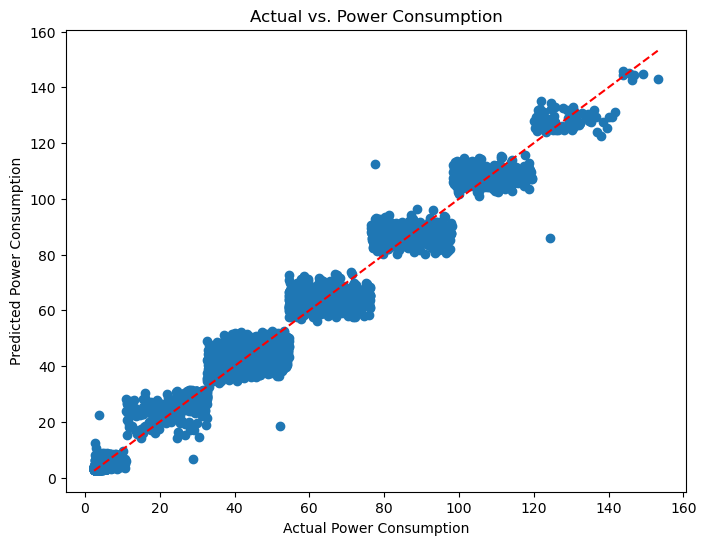

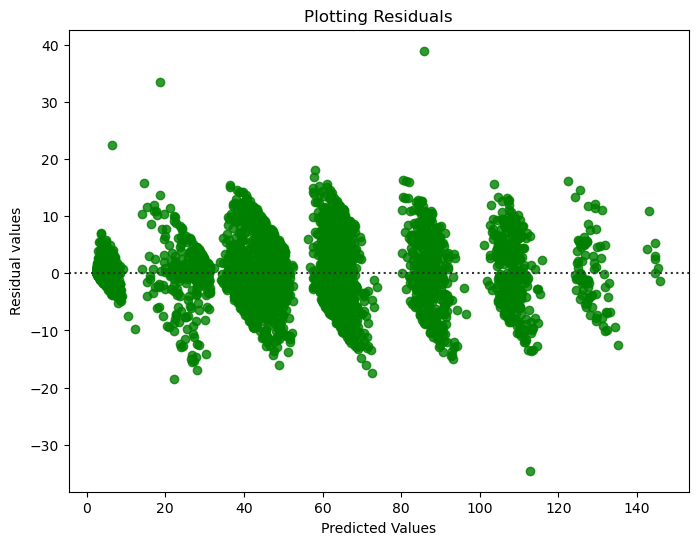

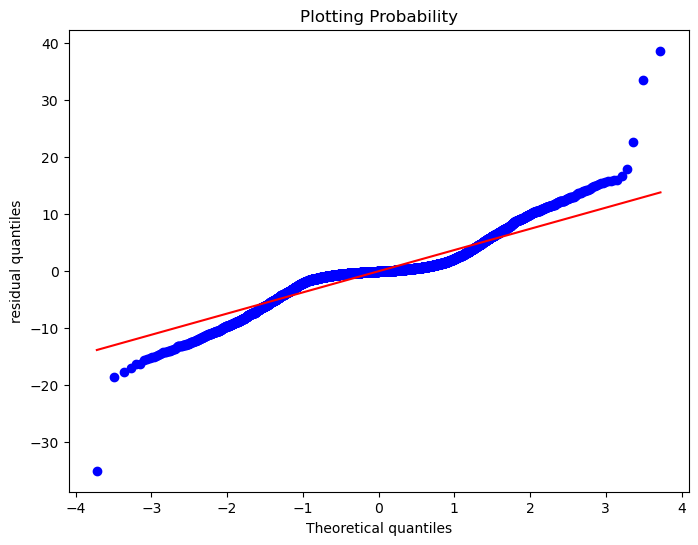

CPU times: total: 4.17 s
Wall time: 7.94 s


In [20]:
%%time
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Extract features (X) and target variable (y)
X = sid[[ 'CO2(tCO2)', 'NSM', 'WeekStatus', 'Day_of_week','Load_Type', 'hour', 'minute', 'day', 'weekday_number']]
y = sid['Usage_kWh']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize Random Forest Regressor with specified parameters
rf_regressor = RandomForestRegressor(n_estimators=100, 
                                     max_features=7,
                                     max_depth=None,
                                     min_samples_split=2,
                                     min_samples_leaf=1)

# Train the model
rf_regressor.fit(X_train, y_train)

# Make Predictions
y_pred = rf_regressor.predict(X_test)

# Evaluate Model Performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r2)

def regression_results(y_1, y_predict):

    # Regression metrics
    explained_variance=metrics.explained_variance_score(y_test, y_predict)
    mean_absolute_error=metrics.mean_absolute_error(y_test, y_predict) 
    mse=metrics.mean_squared_error(y_test, y_predict) 
    #mean_squared_log_error=metrics.mean_squared_log_error(y_test, predicted)
    median_absolute_error=metrics.median_absolute_error(y_test, y_predict)
    r2=metrics.r2_score(y_test, y_predict)

    print('explained_variance is ',round(explained_variance,2))    
    #print('mean_squared_log_error: ', round(mean_squared_log_error,4))
    print('r2 is ', round(r2,4))
    print('MAE is ', round(mean_absolute_error,4))
    print('MSE is ', round(mse,4))
    print('RMSE is', round(np.sqrt(mse),4))
    

def predicted_plot(y_test, y_predict):
    plt.subplots(figsize=(8,6))
    plt.scatter(y_test, y_predict)
    plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red')
    plt.xlabel("Actual Power Consumption")
    plt.ylabel("Predicted Power Consumption")
    plt.title("Actual vs. Power Consumption")
    plt.show()
    
def residual_plot(y_test, y_predict):
    residual_value = y_test - y_predict
    plt.figure(figsize=(8,6))
    sns.residplot(x=y_predict, y=residual_value ,scatter_kws={"color": "green"})
    plt.title("Plotting Residuals")
    plt.xlabel("Predicted Values")
    plt.ylabel("Residual values")
    plt.show()
    return residual_value

def probability_plot(residual):
    plt.subplots(figsize=(8,6))
    stats.probplot(residual, plot=plt)
    plt.title('Plotting Probability')
    plt.xlabel('Theoretical quantiles')
    plt.ylabel('residual quantiles')
   
    plt.show()

regression_results(y_test,y_pred)
predicted_plot(y_test,y_pred)
residual=residual_plot(y_test,y_pred)
probability_plot(residual)


# Gradient Boosting implementation for Industry dataset

explained_variance is  0.99
r2 is  0.9862
MAE is  2.4395
MSE is  15.732
RMSE is 3.9664


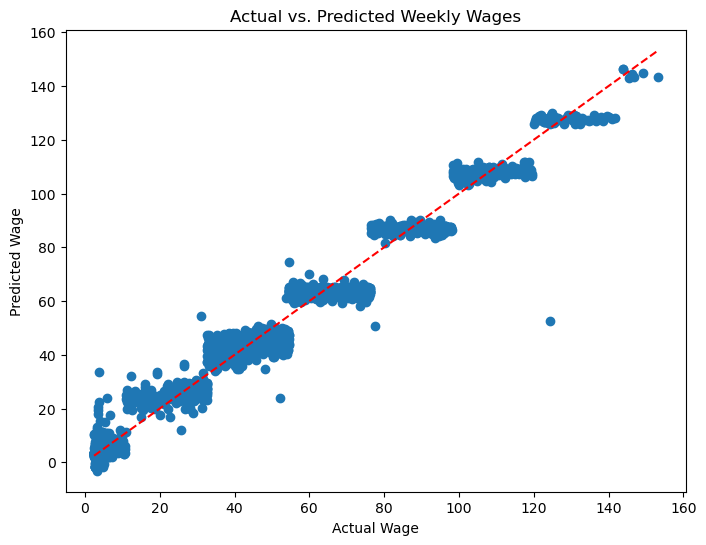

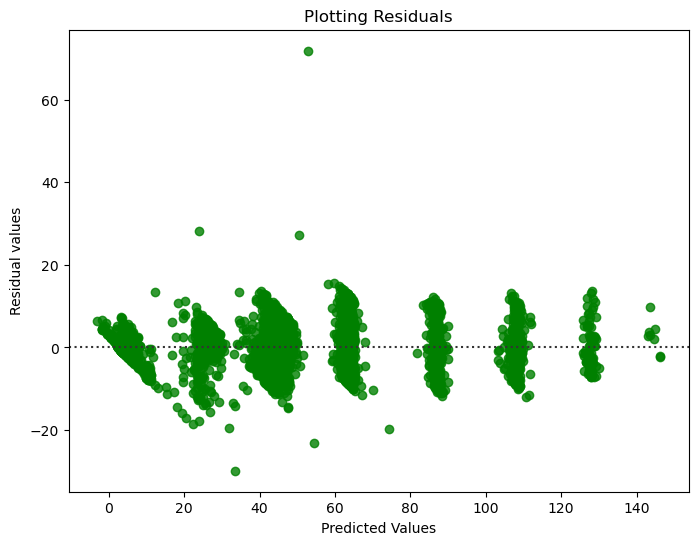

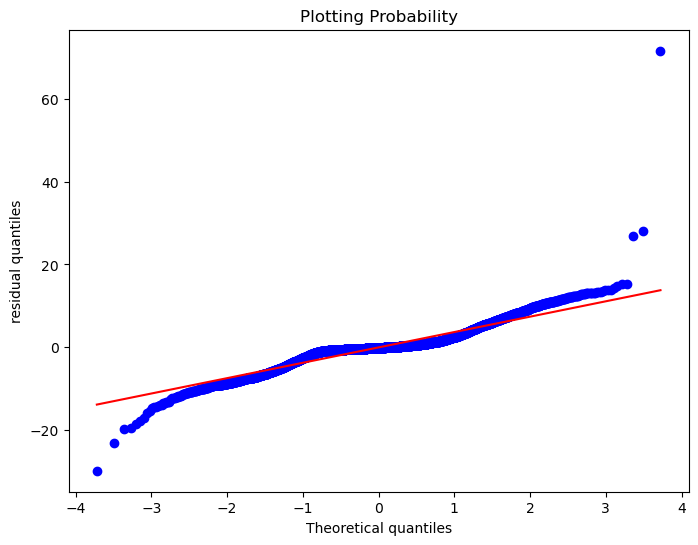

CPU times: total: 5.28 s
Wall time: 9.77 s


In [21]:
%%time
# Import necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error
import pandas as pd

# Assuming you have your DataFrame named 'city'
# Split data into features (X) and target (y)
X = sid[[ 'CO2(tCO2)', 'NSM', 'WeekStatus', 'Day_of_week','Load_Type', 'hour', 'minute', 'day', 'weekday_number']]
y = sid['Usage_kWh']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the GBRT model
gbrt = GradientBoostingRegressor(n_estimators=500, learning_rate=0.1, max_depth=3, random_state=42)
gbrt.fit(X_train, y_train)

# Make predictions
y_pred = gbrt.predict(X_test)

# Evaluate the model
#train_rmse = mean_squared_error(y_train, y_pred_train, squared=False)
#test_rmse = mean_squared_error(y_test, y_pred_test, squared=False)

#print("Train RMSE:", train_rmse)
#print("Test RMSE:", test_rmse)

def regression_results(y_1, y_predict):

    # Regression metrics
    explained_variance=metrics.explained_variance_score(y_test, y_predict)
    mean_absolute_error=metrics.mean_absolute_error(y_test, y_predict) 
    mse=metrics.mean_squared_error(y_test, y_predict) 
    #mean_squared_log_error=metrics.mean_squared_log_error(y_test, predicted)
    median_absolute_error=metrics.median_absolute_error(y_test, y_predict)
    r2=metrics.r2_score(y_test, y_predict)

    print('explained_variance is ',round(explained_variance,2))    
    #print('mean_squared_log_error: ', round(mean_squared_log_error,4))
    print('r2 is ', round(r2,4))
    print('MAE is ', round(mean_absolute_error,4))
    print('MSE is ', round(mse,4))
    print('RMSE is', round(np.sqrt(mse),4))
    

def predicted_plot(y_test, y_predict):
    plt.subplots(figsize=(8,6))
    plt.scatter(y_test, y_predict)
    plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red')
    plt.xlabel("Actual Wage")
    plt.ylabel("Predicted Wage")
    plt.title("Actual vs. Predicted Weekly Wages")
    plt.show()
    
def residual_plot(y_test, y_predict):
    residual_value = y_test - y_predict
    plt.figure(figsize=(8,6))
    sns.residplot(x=y_predict, y=residual_value ,scatter_kws={"color": "green"})
    plt.title("Plotting Residuals")
    plt.xlabel("Predicted Values")
    plt.ylabel("Residual values")
    plt.show()
    return residual_value

def probability_plot(residual):
    plt.subplots(figsize=(8,6))
    stats.probplot(residual, plot=plt)
    plt.title('Plotting Probability')
    plt.xlabel('Theoretical quantiles')
    plt.ylabel('residual quantiles')
   
    plt.show()

regression_results(y_test,y_pred)
predicted_plot(y_test,y_pred)
residual=residual_plot(y_test,y_pred)
probability_plot(residual)

